In [ ]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from sklearn.metrics import classification_report

from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join
import os


Using TensorFlow backend.


In [ ]:
img_width = 150
img_height = 150



images_root = "/content/drive/My Drive/class"
train_root = os.path.join(images_root,'train')
eval_root = os.path.join(images_root,'validate')
test_root=os.path.join(images_root,'test')
train_samples = 120
validation_samples = 40
epochs = 5
batch_size = 8

# Check for TensorFlow or Thieno
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [ ]:
model = Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows size
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
import keras
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.Adam(lr=.0001),
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:

train_generator = train_datagen.flow_from_directory(
    train_root,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 267 images belonging to 2 classes.


In [ ]:
print(train_generator.class_indices)

{'invoices': 0, 'receipts': 1}


In [ ]:
imgs, labels = next(train_generator)

In [ ]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

8
0.0


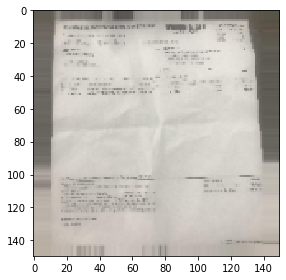

1.0


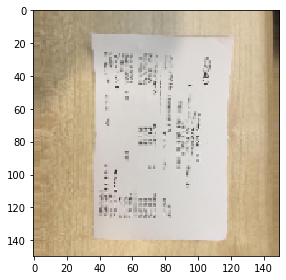

0.0


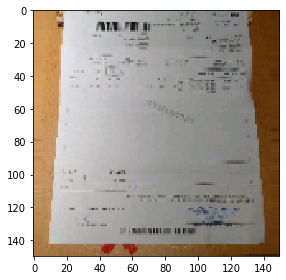

0.0


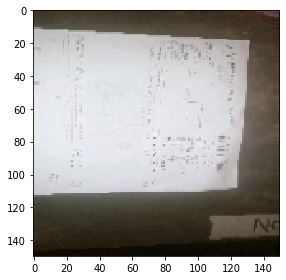

0.0


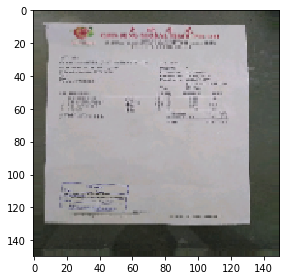

1.0


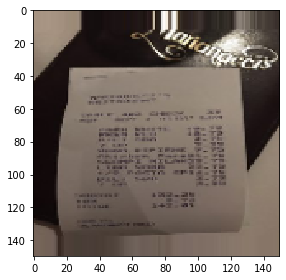

0.0


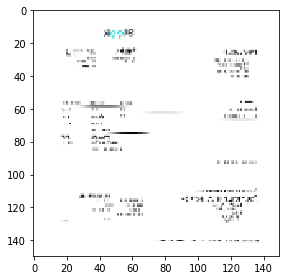

1.0


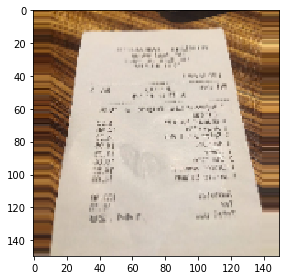

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [ ]:
validation_generator = test_datagen.flow_from_directory(
    eval_root,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 41 images belonging to 2 classes.


In [ ]:
print(validation_generator.class_indices)

{'invoices': 0, 'receipts': 1}


In [ ]:
test_generator = test_datagen.flow_from_directory(    test_root,    target_size=(img_width, img_height),    batch_size=batch_size,    class_mode='binary') 

Found 73 images belonging to 2 classes.


In [ ]:
print(test_generator.class_indices)

{'invoices': 0, 'receipts': 1}


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)
model.save('/content/drive/My Drive/my_model.h5') 

Epoch 1/100
15/15 [==============================] - 57s 4s/step - loss: 0.6804 - accuracy: 0.6087 - val_loss: 0.5056 - val_accuracy: 0.6750
Epoch 2/100
15/15 [==============================] - 54s 4s/step - loss: 0.7100 - accuracy: 0.5917 - val_loss: 0.6668 - val_accuracy: 0.6970
Epoch 3/100
15/15 [==============================] - 22s 1s/step - loss: 0.6503 - accuracy: 0.6087 - val_loss: 0.6192 - val_accuracy: 0.6970
Epoch 4/100
15/15 [==============================] - 13s 842ms/step - loss: 0.6662 - accuracy: 0.5667 - val_loss: 0.6536 - val_accuracy: 0.7576
Epoch 5/100
15/15 [==============================] - 11s 745ms/step - loss: 0.6209 - accuracy: 0.6500 - val_loss: 0.5789 - val_accuracy: 0.9394
Epoch 6/100
15/15 [==============================] - 12s 782ms/step - loss: 0.6184 - accuracy: 0.7043 - val_loss: 0.5325 - val_accuracy: 0.8485
Epoch 7/100
15/15 [==============================] - 13s 836ms/step - loss: 0.6039 - accuracy: 0.6250 - val_loss: 0.5462 - val_accuracy: 0.7000
E

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


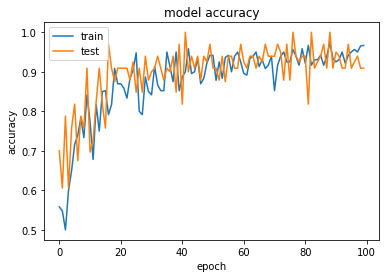

[]


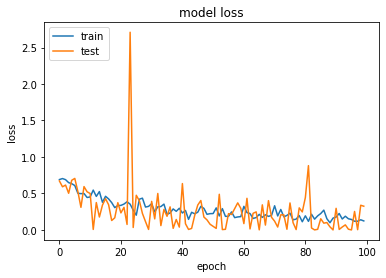

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
## Now Predict
predict_dir_path=test_root
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:

## Now Predict
predict_dir_path='/content/drive/My Drive/class/mix/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['IMG_20200103_183032.jpg', 'IMG_20200110_171128.jpg', 'IMG_20200109_101904_1.jpg', 'IMG_20200103_183032 (1).jpg', 'IMG_20191231_170735.jpg', 'IMG_20191209_110319.jpg', 'IMG_20191119_155546_2.jpg', 'ML invoice 001.jpg']


In [ ]:

# predicting images
from keras.preprocessing import image
i_counter = 0 
r_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'invoices')
        i_counter += 1
    else:
        print(file + ": " + 'receipts')
        r_counter += 1
print("invoices :",i_counter)
print("Total receipts :",r_counter)

IMG_20200103_183032.jpg: receipts
IMG_20200110_171128.jpg: receipts
IMG_20200109_101904_1.jpg: receipts
IMG_20200103_183032 (1).jpg: receipts
IMG_20191231_170735.jpg: invoices
IMG_20191209_110319.jpg: invoices
IMG_20191119_155546_2.jpg: invoices
ML invoice 001.jpg: invoices
invoices : 4
Total receipts : 4


In [ ]:
loss, acc = model.evaluate_generator(test_generator, 
                      steps=validation_samples // batch_size, verbose=1)
print('Testing data   -> loss: %.3f, acc: %.3f' % (loss, acc))

5/5 [==============================] - 2s 469ms/step
Testing data   -> loss: 0.113, acc: 0.975


In [ ]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
test_samples = 73

In [ ]:
Y_pred = model.predict_generator(test_generator, test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ['receipts', 'invoices']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))


**Passing images that are invoices only**

In [ ]:
predict_dir_path='/content/drive/My Drive/class/test/invoices/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['-AkxZEIt0uArkIIWRgrOhGP3hmtGc1fqgnsK.png', '-BXvxubvsZoQfN8wKGgr_JlBaV9j-Hwz88d7.png', '-C7uOIL1iGHIBlnNT7l4QcwsP7a9z0yLLKj9.png', '-BhtKZs_PrPj-ueNZMMrlpXRm-sN2wfSmcL5.png', '-C_3vmAgXVcu1yTUs7GMYO3E2m82M2pcBnwl.png', '-GAr5VOwKYKHvyqhiIVrZLmbsnksVkLrThQA.png', '-LwDjNH909lCINkU-C8WdlgCh8H93zSwxYp0.png', '-MDEPrMhfxvHBaisUEipGX_8FxN31RjhZptJ.png', '-PZTpJCu7JwR2CvgS5TYOaPvV5fRX5Q-p4JP.png', '-SkDF10rcsfTfPtdS4q-Py9IzlKE5p37AXqf.png', '-eW6_PswsB7FwlAOGgpJlh9kNuOrG20L2Z8M.png', '-faqQ_Idxk8xflUZIeryfWSjSt7Jw-_sEVhw.png', '-jt460UI13ZzLMOtFjOCCkbtR_jAQr8Pl1XH.png', '-l5xX9f-qalxo5J3v1rzJeHWfo2NhX8LpVUA.png', '-ltYkrQFQdKtb0WksoJVRq49oVH0PVqd9wGf.png', '-p6nQDoPF_psU3zzOsQNNuq9wQrdtr740ADa.png', '-zoypwMxVMvivAs2VHFmX_TwK6oOQ9FOT1o1.png', 'Copy of -2hz9FFAnXtSIhe5-rLZcSvuDL9pr_rzRFhY (1).png', 'Copy of -3oixeerVjJCpugtqwoFSGeAHq8FpqeTgT01 (1).png', 'Copy of -_PvOze_V5ztpuUMYmtf_KcNB8w_R69PYWjl (1).png', 'Copy of -3vu3fgjkZxsMmLSmysYAz3OC3_0G3I8X-_k (1).png', 'Copy of -5hTnZbBvoQCiocNBI

In [ ]:

# predicting images
from keras.preprocessing import image
i_counter = 0 
r_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'invoices')
        i_counter += 1
    else:
        print(file + ": " + 'receipts')
        r_counter += 1
print("invoices :",i_counter)
print("Total receipts :",r_counter)

-AkxZEIt0uArkIIWRgrOhGP3hmtGc1fqgnsK.png: invoices
-BXvxubvsZoQfN8wKGgr_JlBaV9j-Hwz88d7.png: invoices
-C7uOIL1iGHIBlnNT7l4QcwsP7a9z0yLLKj9.png: invoices
-BhtKZs_PrPj-ueNZMMrlpXRm-sN2wfSmcL5.png: invoices
-C_3vmAgXVcu1yTUs7GMYO3E2m82M2pcBnwl.png: invoices
-GAr5VOwKYKHvyqhiIVrZLmbsnksVkLrThQA.png: invoices
-LwDjNH909lCINkU-C8WdlgCh8H93zSwxYp0.png: invoices
-MDEPrMhfxvHBaisUEipGX_8FxN31RjhZptJ.png: invoices
-PZTpJCu7JwR2CvgS5TYOaPvV5fRX5Q-p4JP.png: invoices
-SkDF10rcsfTfPtdS4q-Py9IzlKE5p37AXqf.png: invoices
-eW6_PswsB7FwlAOGgpJlh9kNuOrG20L2Z8M.png: invoices
-faqQ_Idxk8xflUZIeryfWSjSt7Jw-_sEVhw.png: invoices
-jt460UI13ZzLMOtFjOCCkbtR_jAQr8Pl1XH.png: invoices
-l5xX9f-qalxo5J3v1rzJeHWfo2NhX8LpVUA.png: invoices
-ltYkrQFQdKtb0WksoJVRq49oVH0PVqd9wGf.png: invoices
-p6nQDoPF_psU3zzOsQNNuq9wQrdtr740ADa.png: invoices
-zoypwMxVMvivAs2VHFmX_TwK6oOQ9FOT1o1.png: invoices
Copy of -2hz9FFAnXtSIhe5-rLZcSvuDL9pr_rzRFhY (1).png: invoices
Copy of -3oixeerVjJCpugtqwoFSGeAHq8FpqeTgT01 (1).png: invoices
Copy of

**Passing images that are receipts only**

In [ ]:
predict_dir_path='/content/drive/My Drive/class/test/receipts/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['1167-receipt.jpg', '1166-receipt.jpg', '1175-receipt.jpg', '1160-receipt.jpg', '1174-receipt.jpg', '1173-receipt.jpg', '1164-receipt.jpg', '1165-receipt.jpg', '1177-receipt.jpg', '1170-receipt.jpg', '1179-receipt.jpg', '1139-receipt.jpg', '1172-receipt.jpg', '1162-receipt.jpg', '1171-receipt.jpg', '1178-receipt.jpg', '1163-receipt.jpg', '1169-receipt.jpg', '1161-receipt.jpg', '1176-receipt.jpg', '1168-receipt.jpg', '1120-receipt.jpg', '1124-receipt.jpg', '1125-receipt.jpg', '1122-receipt.jpg', '1129-receipt.jpg', '1121-receipt.jpg', '1138-receipt.jpg', '1131-receipt.jpg', '1133-receipt.jpg', '1136-receipt.jpg', '1123-receipt.jpg', '1132-receipt.jpg', '1137-receipt.jpg', '1126-receipt.jpg', '1135-receipt.jpg', '1130-receipt.jpg', '1128-receipt.jpg', '1134-receipt.jpg', '1127-receipt.jpg']


In [ ]:

# predicting images
from keras.preprocessing import image
i_counter = 0 
r_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'invoices')
        i_counter += 1
    else:
        print(file + ": " + 'receipts')
        r_counter += 1
print("invoices :",i_counter)
print("Total receipts :",r_counter)

1167-receipt.jpg: receipts
1166-receipt.jpg: receipts
1175-receipt.jpg: invoices
1160-receipt.jpg: receipts
1174-receipt.jpg: receipts
1173-receipt.jpg: receipts
1164-receipt.jpg: receipts
1165-receipt.jpg: invoices
1177-receipt.jpg: invoices
1170-receipt.jpg: receipts
1179-receipt.jpg: receipts
1139-receipt.jpg: receipts
1172-receipt.jpg: receipts
1162-receipt.jpg: receipts
1171-receipt.jpg: receipts
1178-receipt.jpg: receipts
1163-receipt.jpg: receipts
1169-receipt.jpg: receipts
1161-receipt.jpg: receipts
1176-receipt.jpg: receipts
1168-receipt.jpg: receipts
1120-receipt.jpg: receipts
1124-receipt.jpg: receipts
1125-receipt.jpg: receipts
1122-receipt.jpg: receipts
1129-receipt.jpg: receipts
1121-receipt.jpg: receipts
1138-receipt.jpg: receipts
1131-receipt.jpg: receipts
1133-receipt.jpg: receipts
1136-receipt.jpg: receipts
1123-receipt.jpg: receipts
1132-receipt.jpg: receipts
1137-receipt.jpg: receipts
1126-receipt.jpg: receipts
1135-receipt.jpg: receipts
1130-receipt.jpg: receipts
1

**Passing images of both the categories which represnt have names belonging to their category**

In [ ]:
predict_dir_path='/content/drive/My Drive/class/labelled images test/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['receipts.9.jpg', 'receipts.8.jpg', 'receipts.11.jpg', 'receipts.10.jpg', 'invoices.0.jpg', 'invoices.3.jpg', 'invoices.2.jpg', 'invoices.1.jpg']


In [ ]:

# predicting images
from keras.preprocessing import image
i_counter = 0 
r_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'invoices')
        i_counter += 1
    else:
        print(file + ": " + 'receipts')
        r_counter += 1
print("invoices :",i_counter)
print("Total receipts :",r_counter)

receipts.9.jpg: receipts
receipts.8.jpg: receipts
receipts.11.jpg: invoices
receipts.10.jpg: receipts
invoices.0.jpg: invoices
invoices.3.jpg: invoices
invoices.2.jpg: invoices
invoices.1.jpg: invoices
invoices : 5
Total receipts : 3
